<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 5** - Sept 21, 2016

- Regularization
- Principal Component Analysis
- Lagrange multipliers
- Explained variance 

<hr/>

### Feedback

- Anonymous voting on Doodle

> Use any alias you like at

>    http://doodle.com/poll/9xauu6vptt66saab

- Be honest to help me!

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ **basis** functions 

>$\displaystyle f(t;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(t) $

> It's a dot product

>$\displaystyle f(t;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(t)$ 

>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$

- Evaluated at all data points $x=(x_1,x_2,\dots,x_N)$

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol{}X\boldsymbol\beta$

> where $X_{ik} = \phi_k(x_i)$





### Method of Least Squares

- At the optimum

>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y $

- Hat matrix

>$\hat{y} = X\hat\beta = H y$

Populating the interactive namespace from numpy and matplotlib


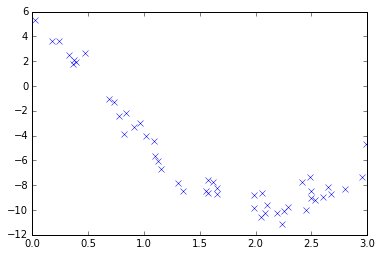

In [1]:
%pylab inline
# generate sample with error
x = 3 * random.rand(50) # between 0 and 3
eps = 1 * random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + eps;  
#plot(x,y,'bo');
y = 10*cos(x+1) + eps;  
plot(x,y,'bx');
#x.shape, default 50 rows, column vector

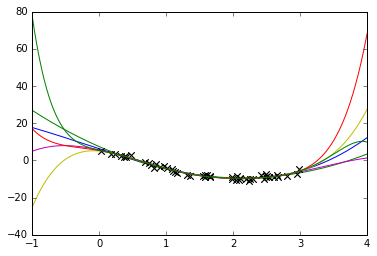

In [5]:
def poly(x,n):
    X = zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X

color = 'yrgbm'*5

for n in range(2,8):#interval left close right open
    X = poly(x,n)
    bHat = linalg.pinv(X).dot(y)
    xx = np.linspace(-1,4,500)
    XX = poly(xx,n)
    yy = XX.dot(bHat)
    plot(x,y,'kx');
    #ylim(-20,20);
    plot(xx,yy,'-',c=color[n]);     

### Regularization

Penalize large coefficients in $\beta$

- **Ridge regression** uses $L_2$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} |\!| y- X\beta |\!|^2_2 + \lambda |\!|\beta|\!|^2_2$  

> or even with a constant matrix $\Gamma$

> $\displaystyle \hat{\beta} = \arg\!\min  |\!| y- X\beta |\!|^2_2 + |\!|\Gamma \beta|\!|^2_2$  

- **Lasso regression** uses $L_1$

> $\displaystyle \hat{\beta} = \arg\!\min  |\!| y- X\beta |\!|^2_2 + \lambda |\!|\beta|\!|_1$  

> $L_1$ yields sparse results

Different geometric meanings! 

### Linear Combinations

- Coefficients mix a given set of basis vectors, functions, images, shapes, ...

$$ f(x;\beta) = \sum_k \beta_k \phi_k(x) $$

> Fourier series

<img src=files/Periodic_identity_function.gif width=400> 
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/e/e8/Periodic_identity_function.gif width=400> -->

> Discete Cosine Transform (JPEG) 

<img src=files/DCT_basis_thumb.gif width=200>
<!--<img src=http://www.digitude.net/blog/wp-content/uploads/2010/07/DCT_basis_thumb.gif width=200>-->

> Spherical Harmonics

<img src=files/Spherical_Harmonics.png>
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>-->


- What is a good basis like?



<h1><font color="darkblue">Principal Component Analysis</font></h1>

### Statistical Learning

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



<img src=files/800px-GaussianScatterPCA.png width=300 align=left>

### Directions of Maximum Variance

- Let $X\in\mathbb{R}^N$ be a continuous random variable with 0 mean and covariance matrix $C$. What is the direction of maximum variance?

> For any vector $a\in\mathbb{R}^N$ 

> $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E}\left[(a^T X)(X^T a)\right] = \mathbb{E}\left[a^T(XX^T)\,a\right]$

> so

> $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$

> We have to maximize this such that $a^2\!=\!1$

### Constrained Optimization

- **Lagrange multiplier**: extra term with new parameter $\lambda$

> $\displaystyle  \max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1)\right]$

- Partial derivatives vanish at optimum

> $\displaystyle \frac{\partial}{\partial\lambda} \rightarrow\ \  a^2\!-\!1 = 0\ \ $  (duh!)

> $\displaystyle \frac{\partial}{\partial a_k} \rightarrow\ \  $?

### With indices


> $\displaystyle \max_{a\in{}\mathbb{R}^N}  \left[ \sum_{i,j} a_i C_{ij} a_j - \lambda\,\left(\sum_i a_i^2 - 1\right) \right]$

- Partial derivatives vanish at optimum

> $\displaystyle \sum_{i,j} \frac{\partial a_i}{\partial a_k} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \frac{\partial a_j}{\partial a_k} - 2\lambda\,\left(\sum_i a_i \frac{\partial a_i}{\partial a_k}\right) = 0$ 

> $\displaystyle \sum_{i,j} \delta_{ik} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \delta_{jk} - 2\lambda\,\left(\sum_i a_i \delta_{ik}\right) = 0$ 

> $\displaystyle \sum_{j} C_{kj} a_j + \sum_{i} a_i C_{ik}  - 2\lambda\,a_k = 0$ 

### And back again...

- With vectors and matrices

> $\displaystyle  Ca + C^Ta - 2\lambda a = 0$

> but $C$ is symmetric 

> $\displaystyle  Ca = \lambda a $

- Eigenproblem !!

### Result

- The value of maximum variance is

> $\displaystyle  a^TCa = a^T \lambda a = \lambda a^Ta = \lambda$

> the largest eigenvalue $\lambda_1$

- The direction of maximum variance is the corresponding eigenvector $a_1$

> $\displaystyle  Ca_1 = \lambda_1 a_1 $

- This is the **1st Principal Component** 




### 2nd Principal Component

- Direction of largest variance uncorrelated to 1st PC

> $\displaystyle  \max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1) - \lambda'(a^T C\,a_1) \right]$

- Partial derivatives vanish at optimum

> $\displaystyle 2Ca - 2\lambda{}a-\lambda'Ca_1 = 0$

### Result

- Multiply by $a_1^T\cdot$

> $\displaystyle 2a_1^TCa - 2a_1^T\lambda{}a-a_1^T\lambda'Ca_1 = 0$

> $\displaystyle 0 - 0 - \lambda'\lambda_1 = 0 \ \ \rightarrow\ \  \lambda'=0$

- Still just an eigenproblem 

> $\displaystyle  Ca = \lambda a $

- Solution $\lambda_2$ and $a_2$

### PCA 

- In general

> Let $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_N\geq{}0$ be the eigenvalues of $C$ and $\hat{e}_1,\dots,\hat{e}_N$ the corresponding eigenvectors

> $\displaystyle  C = \sum_{k=1}^N\ \lambda_k\left(\hat{e}_k\,\hat{e}_k^T\right) $

> With diagonal $\Lambda$ matrix of the eigenvalues and an $E$ matrix of $[\hat{e}_1, \dots, \hat{e}_N]$

> $\displaystyle  C = E\ \Lambda\ E^T$


- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best approximation is taking the first $K$ PCs

> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left(\hat{e}_k\,\hat{e}_k^T\right) =  E_K\Lambda_KE_K^T$





### Detour: Adding Variances

- If $X$ and $Y$ random variables are independent and $Z=X\pm{}Y$, then 

> $\mathbb{Var}[Z]=\mathbb{Var}[X]+\mathbb{Var}[Y]$


- Proof

> $\mathbb{Var}[Z]=\mathbb{E}\big[(Z-\mu_Z)^2\big] $

> $\ \ =\mathbb{E}\big[Z^2\big] - 2\mathbb{E}[Z]\mu_Z + \mu_{z}^2 $

> $\ \ =\mathbb{E}\big[Z^2\big] - \mu_{z}^2 $

> $\ \ =\mathbb{E}\big[(X\pm{}Y)^2\big] - \left(\mu_{X\pm{}Y}\right)^2 $

> $\ \ =\mathbb{E}\big[(X\pm{}Y)^2\big] - \left(\mu_{X}\pm{}\mu_Y\right)^2 $

> $\ \ =\mathbb{E}\big[X^2\pm{}2XY+Y^2\big] - \left(\mu_{X}^2\pm{}2\mu_X\mu_Y+\mu_Y^2\right)$

> $\ \ = \mathbb{E}\big[X^2\big] \pm 2\,\mathbb{E}\big[XY\big] + \mathbb{E}\big[Y^2\big] - \left(\mu_{X}^2\pm{}2\mu_X\mu_Y+\mu_Y^2\right)$

> $\ \ =\mathbb{E}\big[X^2\big]-\mu_X^2 +\mathbb{E}\big[Y^2\big]-\mu_Y^2 \pm 2\left(\mathbb{E}\big[XY\big] -\mu_X\mu_Y\right) $


> $\ \ =\mathbb{Var}[X]+\mathbb{Var}[Y]\pm 0 $






### New Coordiante System

- The $E$ matrix of eigenvectors is a rotation, $E\,E^T = I$

> $\displaystyle  Z = E^T\, X $


- A truncated set of eigenvectors $E_K$ defines a projection

> $\displaystyle  Z_K = E_K^T\, X $

> and

> $\displaystyle  X_K = E_K E_K^T\, X = P_K\,X $




### Detour: Projections

- If the square of a matrix is equal to itself

> $\displaystyle  P^2 = P $

- For example, projecting on the $\hat{e}$ unit vector

<img src=files/Y7Gx8.png align=right width=250>

> Scalar times vector

> $\displaystyle  r' = \hat{e}\left(\hat{e}^T r\right) = \hat{e} \beta_r$

> Or  projection of vector $r$

> $\displaystyle  r' = \left(\hat{e}\,\hat{e}^T\right)r = P\,r$




### Again

- The eigenvectors of largest eigenvalues capture the most variance

> $\displaystyle  C \approx C_K = \sum_{k=1}^K\ \lambda_k\left(\hat{e}_k\,\hat{e}_k^T\right) = \sum_{k=1}^K\ \lambda_k\,P_k$

- And the remaining eigenvectors span the subspace with the least variance

> $\displaystyle  C - C_K = %\sum_{l=K+1}^N\ \lambda_l\left(\hat{e}_l\,\hat{e}_l^T\right) =
\sum_{l=K+1}^N\ \lambda_l\,P_l$


### Samples

- Set of $N$-vectors with expectation value 0 arranged in $X=\left[x_1, x_2, \dots\right]$ <br>
<font color="red">*This is NOT the random variable we talked about previously but the data matrix!*</font>

> Sample covariance matrix is

>$\displaystyle C \propto X X^T = \sum_i x_i x_i^T$

- Singular Value Decomposition (SVD)

>$\displaystyle X = U W V^T$

> where $U^TU=I$, $W$ is diagonal, and $V^TV=I$

- Hence

>$\displaystyle C \propto UWV^T\ VWU^T = U W^2 U^T$

> So if $C=E\Lambda E^T$, then $E = U$ and $ \Lambda \propto W^2$



### Random Sample from Bivariate Normal 

- See previous lecture

Average
[[ 0.29539537]
 [ 1.79726793]]
Covariance
[[ 9.10385811  8.90343512]
 [ 8.90343512  9.52045068]]


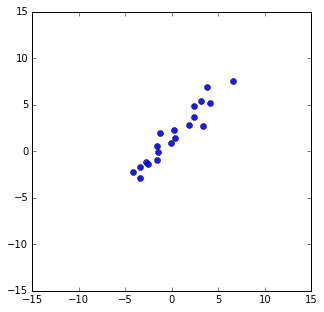

In [6]:
from scipy.stats import norm   #没有重命名为gaussian
# generate many 2D (column) vectors
S = norm.rvs(0,1,(2,20))
S[0,:] *= 4  # scale axis 0
f = +pi/4    # rotate by 45 degrees
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)
X += np.array([[1],[3]]) # shift

figure(figsize=(5,5));
xlim(-15,15); ylim(-15,15);
plot(X[0,:],X[1,:],'o',alpha=0.9)

# subtract sample mean
avg = mean(X, axis=1).reshape(X[:,1].size,1)   #求出的mean变成符合使用要求的形状,否则就是个向量
X -= avg
# sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) #
print "Average\n", avg
print "Covariance\n", C

In [13]:
#L lamda, E e-vector
L, E = np.linalg.eig(C)
E, L   #特征向量都是标准正交的
#E.dot(E)

(array([[-0.71532812, -0.69878872],
        [ 0.69878872, -0.71532812]]), array([  0.40628306,  18.21802573]))

In [10]:
E, L, E_same = np.linalg.svd(C)
E, L,E_same   #E symmetric,特征值也是从大到小排列

(array([[-0.69878872, -0.71532812],
        [-0.71532812,  0.69878872]]),
 array([ 18.21802573,   0.40628306]),
 array([[-0.69878872, -0.71532812],
        [-0.71532812,  0.69878872]]))

In [6]:
#E.dot(E)=I
E.dot(E.T)

array([[  1.00000000e+00,  -1.66533454e-16],
       [ -1.66533454e-16,   1.00000000e+00]])

In [7]:
#数值上 E.T 和 E same
np.allclose( E.T, np.linalg.inv(E) )

True

In [20]:
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)
#np.linalg.svd?

(array([[-0.75003032, -0.66140345],
        [-0.66140345,  0.75003032]]), array([ 17.25893392,   0.83427097]))

In [9]:
[ np.allclose( U.dot(U.T), np.eye(U[:,0].size) ), 
  np.allclose( V.dot(V.T), np.eye(V[:,0].size) )  ]

[True, True]

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=X[:,0].size)
pca.fit(X.T) # different convention: row vs col !!!
# pca.transform(X.T)
pca.components_.T, pca.explained_variance_

(array([[ 0.73497876,  0.67809013],
        [ 0.67809013, -0.73497876]]), array([ 21.82111081,   0.59968067]))